# Get data from Tiingo

In [2]:
# use api key for key variable

In [1]:
import pandas_datareader as pdr

In [8]:
#df = pdr.get_data_tiingo('AAPL', api_key = key)

C:\Users\Harsh\anaconda3\envs\tf_2_5\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [9]:
#df.to_csv('AAPL.csv')

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('AAPL.csv')

print(df.shape)
df.head()

(1257, 14)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-07-25 00:00:00+00:00,97.34,98.84,96.92,98.250,40382921,22.730199,23.080469,22.632123,22.942696,161531684,0.0,1.0
1,AAPL,2016-07-26 00:00:00+00:00,96.67,97.97,96.42,96.820,56239822,22.573745,22.877312,22.515367,22.608772,224959288,0.0,1.0
2,AAPL,2016-07-27 00:00:00+00:00,102.95,104.35,102.75,104.265,92344820,24.040209,24.367128,23.993507,24.347280,369379280,0.0,1.0
3,AAPL,2016-07-28 00:00:00+00:00,104.34,104.45,102.82,102.830,39869839,24.364793,24.390480,24.009853,24.012188,159479356,0.0,1.0
4,AAPL,2016-07-29 00:00:00+00:00,104.21,104.55,103.68,104.190,27733688,24.334436,24.413831,24.210674,24.329766,110934752,0.0,1.0


In [11]:
df1 = df.reset_index()['close']

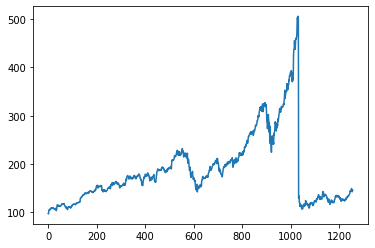

In [12]:
plt.plot(df1)

# Preprocessing

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range = (0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [18]:
df1

array([[0.00163646],
       [0.        ],
       [0.01533877],
       ...,
       [0.11181672],
       [0.12085389],
       [0.11902203]])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_size = int(len(df1) * 0.65)
test_size = len(df1) - train_size
train_data, test_data = df1[0:train_size, :], df1[train_size: , :]

In [22]:
train_data.shape

(817, 1)

In [23]:
test_data.shape

(440, 1)

In [24]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i: (i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [25]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape, y_train.shape)

(716, 100) (716,)


In [27]:
print(X_test.shape, y_test.shape)

(339, 100) (339,)


In [28]:
#reshape inputs to be [samples, time_step, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Model

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [33]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 10s 114ms/step - loss: 0.0131 - val_loss: 0.0418
Epoch 2/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0030 - val_loss: 0.0299
Epoch 3/100
12/12 [==============================] - 0s 26ms/step - loss: 0.0018 - val_loss: 0.0300
Epoch 4/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0011 - val_loss: 0.0218
Epoch 5/100
12/12 [==============================] - 0s 25ms/step - loss: 5.5388e-04 - val_loss: 0.0219
Epoch 6/100
12/12 [==============================] - 0s 25ms/step - loss: 4.4699e-04 - val_loss: 0.0233
Epoch 7/100
12/12 [==============================] - 0s 26ms/step - loss: 4.5679e-04 - val_loss: 0.0207
Epoch 8/100
12/12 [==============================] - 0s 25ms/step - loss: 4.3732e-04 - val_loss: 0.0198
Epoch 9/100
12/12 [==============================] - 0s 24ms/step - loss: 4.2236e-04 - val_loss: 0.0197
Epoch 10/100
12/12 [==============================] - 0s 25ms/step - loss: 4.0

In [36]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [37]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [38]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

175.9489385053868

In [39]:
math.sqrt(mean_squared_error(y_test, test_predict))

204.61722814139574

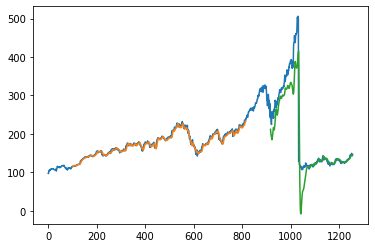

In [41]:
look_back = 100

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back: len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1: len(df1) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# New Predictions

In [42]:
len(test_data)

440

In [43]:
x_input = test_data[len(test_data) - 100: ].reshape(1, -1)
x_input.shape

(1, 100)

In [53]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [45]:
lst_output = []
n_steps = 100
i = 0

while(i < 30):
    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print('{} day input {}'.format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        y_hat = model.predict(x_input, verbose = 0)
        print('{} day output {}'.format(i, y_hat))
        temp_input.extend(y_hat[0].tolist())
        temp_input = temp_input[1:]
        
        lst_output.extend(y_hat.tolist())
        i += 1
        
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        
        y_hat = model.predict(x_input, verbose = 0)
        temp_input.extend(y_hat[0].tolist())
        
        lst_output.extend(y_hat.tolist())
        i += 1

print(lst_output)

1 day input [0.06948854 0.06201456 0.05730057 0.06045137 0.04809242 0.05963314
 0.0569342  0.06177031 0.0594988  0.06672854 0.07058766 0.06860925
 0.05827756 0.05695862 0.06526306 0.06318695 0.05720287 0.05842411
 0.05993845 0.0603781  0.0567388  0.06223438 0.06431049 0.07139368
 0.07215085 0.07627864 0.08228714 0.08872307 0.08443652 0.09222803
 0.08636608 0.092399   0.09156856 0.09322945 0.08900396 0.08995652
 0.08614626 0.09195936 0.09293635 0.09213033 0.09015192 0.08990767
 0.08497387 0.08761174 0.07615651 0.07676713 0.0807728  0.08192077
 0.07371403 0.0714181  0.06374872 0.06912217 0.07517952 0.0722974
 0.06882908 0.06843828 0.07483758 0.07024571 0.07432465 0.07383616
 0.07371403 0.06987934 0.06824288 0.06743686 0.069342   0.06562943
 0.07136925 0.07139368 0.07344536 0.07439793 0.0719066  0.07493527
 0.08258024 0.08052855 0.08177422 0.08577988 0.08253139 0.08702555
 0.09112891 0.09044502 0.0897367  0.08900396 0.0930829  0.09686874
 0.0984075  0.09916467 0.10573494 0.11076645 0.1169

11 day output [[0.11955632]]
12 day input [0.06860925 0.05827756 0.05695862 0.06526306 0.06318695 0.05720287
 0.05842411 0.05993845 0.0603781  0.0567388  0.06223438 0.06431049
 0.07139368 0.07215085 0.07627864 0.08228714 0.08872307 0.08443652
 0.09222803 0.08636608 0.092399   0.09156856 0.09322945 0.08900396
 0.08995652 0.08614626 0.09195936 0.09293635 0.09213033 0.09015192
 0.08990767 0.08497387 0.08761174 0.07615651 0.07676713 0.0807728
 0.08192077 0.07371403 0.0714181  0.06374872 0.06912217 0.07517952
 0.0722974  0.06882908 0.06843828 0.07483758 0.07024571 0.07432465
 0.07383616 0.07371403 0.06987934 0.06824288 0.06743686 0.069342
 0.06562943 0.07136925 0.07139368 0.07344536 0.07439793 0.0719066
 0.07493527 0.08258024 0.08052855 0.08177422 0.08577988 0.08253139
 0.08702555 0.09112891 0.09044502 0.0897367  0.08900396 0.0930829
 0.09686874 0.0984075  0.09916467 0.10573494 0.11076645 0.11699477
 0.11374628 0.11831371 0.1168238  0.11960823 0.12818133 0.12654487
 0.12144009 0.11181672 0.

21 day output [[0.12067391]]
22 day input [0.06223438 0.06431049 0.07139368 0.07215085 0.07627864 0.08228714
 0.08872307 0.08443652 0.09222803 0.08636608 0.092399   0.09156856
 0.09322945 0.08900396 0.08995652 0.08614626 0.09195936 0.09293635
 0.09213033 0.09015192 0.08990767 0.08497387 0.08761174 0.07615651
 0.07676713 0.0807728  0.08192077 0.07371403 0.0714181  0.06374872
 0.06912217 0.07517952 0.0722974  0.06882908 0.06843828 0.07483758
 0.07024571 0.07432465 0.07383616 0.07371403 0.06987934 0.06824288
 0.06743686 0.069342   0.06562943 0.07136925 0.07139368 0.07344536
 0.07439793 0.0719066  0.07493527 0.08258024 0.08052855 0.08177422
 0.08577988 0.08253139 0.08702555 0.09112891 0.09044502 0.0897367
 0.08900396 0.0930829  0.09686874 0.0984075  0.09916467 0.10573494
 0.11076645 0.11699477 0.11374628 0.11831371 0.1168238  0.11960823
 0.12818133 0.12654487 0.12144009 0.11181672 0.12085389 0.11902203
 0.11971597 0.11876662 0.11817786 0.11789942 0.11784512 0.11793974
 0.11812992 0.1183801

In [46]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [47]:
len(df1)

1257

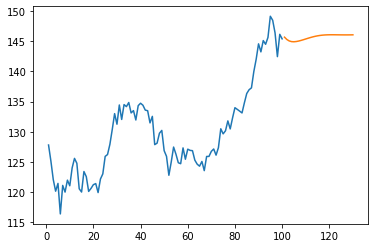

In [48]:
plt.plot(day_new, scaler.inverse_transform(df1[1157: ]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

In [49]:
df_new = df1.tolist()
df_new.extend(lst_output)

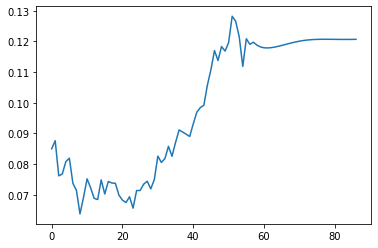

In [52]:
plt.plot(df_new[1200:])